In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/processedData/preprocessed_data.csv")
x=data.to_numpy()

In [3]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

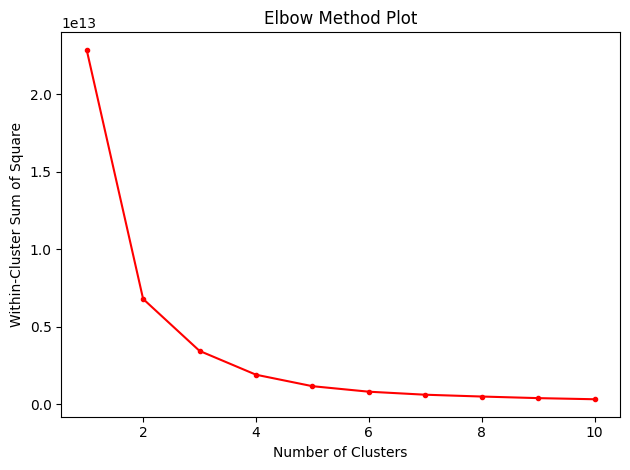

In [4]:
plt.plot(range(1, 11), wcss, marker=".", color='red')
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [6]:
y = kmeans.predict(x)
y_df = pd.DataFrame(y,columns=['Class'])

In [7]:
final_data = pd.concat([data,y_df],axis=1) 
final_data.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),dates,months,Class
0,0,0,30.45,370.95,313.635,0,1,28,10813,8,1,0
1,0,0,28.62,358.52,334.854,0,1,27,9237,6,1,0
2,0,0,9.04,125.20,97.632,1,1,53,11242,2,1,2
3,0,0,33.17,377.40,351.602,1,1,23,23327,7,1,1
4,0,0,8.73,114.62,97.776,0,1,33,8536,3,1,0


In [ ]:
final_data.to_csv("./data/processedData/finalData.csv", index=False)